# Demand Prediction with CatBoost

Euronics International Ltd. is an international association of over 11,000 independent electrical retailers in 37 countries. It functions as a leading international electrical retail group on behalf of its members, and is based in Amsterdam. It operates as a European Economic Interest Grouping entity (an EEIG) meaning that all stores are independent sellers.

The objective of this project is to forecast the sales volume of a specific item, such as Headset, for the upcoming years of 2023-2024. To accomplish this task, we will utilize the CatBoost Model.
CatBoost is an open-source software library developed by Yandex. It provides a gradient boosting framework which among other features attempts to solve for Categorical features using a permutation driven alternative compared to the classical algorithm.

### Import Library & Data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
C:\Users\fadak\.conda\envs\new_env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
#Loading data :
train = pd.read_csv(r'euronics.csv', parse_dates=['date'])

train

,date,sales
0,2018-01-01,26
1,2018-01-02,16
2,2018-01-03,17
3,2018-01-04,25
4,2018-01-05,34
...,...,...
1821,2022-12-27,40
1822,2022-12-28,30
1823,2022-12-29,32
1824,2022-12-30,30


### Cleaning and Preparing Data

In [4]:
#date features :
train['dayofmonth'] = train.date.dt.day
train['dayofyear'] = train.date.dt.dayofyear
train['dayofweek'] = train.date.dt.dayofweek
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year
train['weekofyear'] = train.date.dt.weekofyear
train.head()

C:\Users\fadak\AppData\Local\Temp/ipykernel_1056/1469107328.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['weekofyear'] = train.date.dt.weekofyear


,date,sales,dayofmonth,dayofyear,dayofweek,month,year,weekofyear
0,2018-01-01,26,1,1,0,1,2018,1
1,2018-01-02,16,2,2,1,1,2018,1
2,2018-01-03,17,3,3,2,1,2018,1
3,2018-01-04,25,4,4,3,1,2018,1
4,2018-01-05,34,5,5,4,1,2018,1


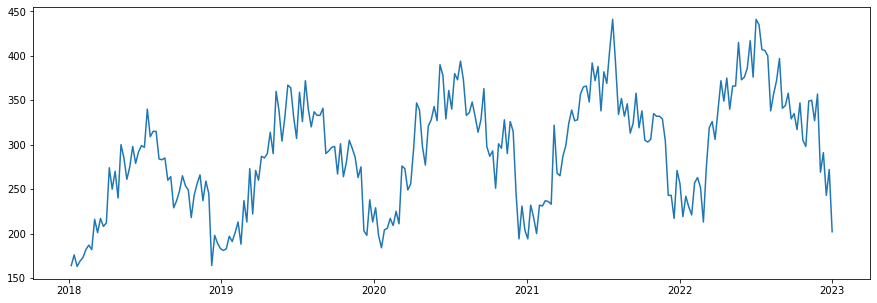

In [5]:
plt.figure(figsize=(15,5))
month_df = train.resample('W',on='date').sum()
x= np.array(month_df.index)
y=np.array(month_df.sales)
plt.plot(x,y)

In [6]:
# dummies features : 
df = pd.get_dummies(train, columns = ['dayofmonth','dayofweek','month','weekofyear'])
df = df.drop(['weekofyear_53'], axis=1)
df.head()

,date,sales,dayofyear,year,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,dayofmonth_6,...,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52
0,2018-01-01,26,1,2018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-02,16,2,2018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-03,17,3,2018,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-04,25,4,2018,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-05,34,5,2018,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Create train and test Data

In [7]:
#train and validation dataframe :
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_val = df[~msk]
print("train shape: ",df_train.shape)
print("validation shape :",df_val.shape)

train shape:  (1457, 106)
validation shape : (369, 106)


In [8]:
y_train = df_train['sales'].values
y_test = df_val['sales'].values
X_train = df_train.drop(['sales', 'date'], axis=1).values
X_test = df_val.drop(['sales', 'date'], axis=1).values

### Modelling

In [10]:
# Initialize the model
CB_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
# Train the model
CB_model.fit(X_train, y_train)

# Make predictions for the test data
CB_y_pred = CB_model.predict(X_test)

0:	learn: 11.3967613	total: 202ms	remaining: 3m 21s
1:	learn: 10.9877802	total: 206ms	remaining: 1m 42s
2:	learn: 10.5453109	total: 210ms	remaining: 1m 9s
3:	learn: 10.2011122	total: 212ms	remaining: 52.9s
4:	learn: 9.9008523	total: 215ms	remaining: 42.8s
5:	learn: 9.5801597	total: 217ms	remaining: 36s
6:	learn: 9.2956768	total: 219ms	remaining: 31.1s
7:	learn: 9.0681323	total: 221ms	remaining: 27.4s
8:	learn: 8.8499058	total: 223ms	remaining: 24.6s
9:	learn: 8.7063512	total: 225ms	remaining: 22.3s
10:	learn: 8.5132202	total: 227ms	remaining: 20.4s
11:	learn: 8.3434396	total: 228ms	remaining: 18.8s
12:	learn: 8.1918908	total: 230ms	remaining: 17.4s
13:	learn: 8.0383647	total: 231ms	remaining: 16.3s
14:	learn: 7.9307350	total: 233ms	remaining: 15.3s
15:	learn: 7.8156669	total: 234ms	remaining: 14.4s
16:	learn: 7.7227429	total: 236ms	remaining: 13.6s
17:	learn: 7.6425958	total: 237ms	remaining: 12.9s
18:	learn: 7.5636627	total: 239ms	remaining: 12.3s
19:	learn: 7.5105268	total: 240ms	rem

197:	learn: 5.2594798	total: 540ms	remaining: 2.19s
198:	learn: 5.2533185	total: 542ms	remaining: 2.18s
199:	learn: 5.2462953	total: 544ms	remaining: 2.17s
200:	learn: 5.2398127	total: 545ms	remaining: 2.17s
201:	learn: 5.2340764	total: 547ms	remaining: 2.16s
202:	learn: 5.2280827	total: 549ms	remaining: 2.15s
203:	learn: 5.2229739	total: 551ms	remaining: 2.15s
204:	learn: 5.2176974	total: 552ms	remaining: 2.14s
205:	learn: 5.2128857	total: 554ms	remaining: 2.13s
206:	learn: 5.2081207	total: 556ms	remaining: 2.13s
207:	learn: 5.1978092	total: 558ms	remaining: 2.12s
208:	learn: 5.1913241	total: 559ms	remaining: 2.12s
209:	learn: 5.1825809	total: 561ms	remaining: 2.11s
210:	learn: 5.1768652	total: 563ms	remaining: 2.1s
211:	learn: 5.1706062	total: 564ms	remaining: 2.1s
212:	learn: 5.1633175	total: 566ms	remaining: 2.09s
213:	learn: 5.1551148	total: 568ms	remaining: 2.08s
214:	learn: 5.1504064	total: 569ms	remaining: 2.08s
215:	learn: 5.1427818	total: 571ms	remaining: 2.07s
216:	learn: 5.

413:	learn: 4.1958810	total: 885ms	remaining: 1.25s
414:	learn: 4.1906760	total: 887ms	remaining: 1.25s
415:	learn: 4.1872051	total: 889ms	remaining: 1.25s
416:	learn: 4.1852748	total: 890ms	remaining: 1.24s
417:	learn: 4.1827317	total: 892ms	remaining: 1.24s
418:	learn: 4.1794578	total: 894ms	remaining: 1.24s
419:	learn: 4.1758580	total: 895ms	remaining: 1.24s
420:	learn: 4.1709761	total: 897ms	remaining: 1.23s
421:	learn: 4.1662485	total: 899ms	remaining: 1.23s
422:	learn: 4.1631282	total: 901ms	remaining: 1.23s
423:	learn: 4.1591468	total: 902ms	remaining: 1.23s
424:	learn: 4.1570307	total: 904ms	remaining: 1.22s
425:	learn: 4.1533239	total: 906ms	remaining: 1.22s
426:	learn: 4.1489886	total: 907ms	remaining: 1.22s
427:	learn: 4.1453266	total: 909ms	remaining: 1.21s
428:	learn: 4.1403946	total: 911ms	remaining: 1.21s
429:	learn: 4.1359232	total: 912ms	remaining: 1.21s
430:	learn: 4.1312506	total: 914ms	remaining: 1.21s
431:	learn: 4.1274555	total: 915ms	remaining: 1.2s
432:	learn: 4

627:	learn: 3.5035744	total: 1.23s	remaining: 730ms
628:	learn: 3.5006862	total: 1.23s	remaining: 728ms
629:	learn: 3.4975323	total: 1.24s	remaining: 726ms
630:	learn: 3.4940242	total: 1.24s	remaining: 724ms
631:	learn: 3.4922059	total: 1.24s	remaining: 721ms
632:	learn: 3.4909034	total: 1.24s	remaining: 719ms
633:	learn: 3.4876089	total: 1.24s	remaining: 717ms
634:	learn: 3.4857435	total: 1.24s	remaining: 715ms
635:	learn: 3.4839079	total: 1.25s	remaining: 713ms
636:	learn: 3.4820770	total: 1.25s	remaining: 711ms
637:	learn: 3.4812788	total: 1.25s	remaining: 709ms
638:	learn: 3.4773153	total: 1.25s	remaining: 706ms
639:	learn: 3.4746047	total: 1.25s	remaining: 705ms
640:	learn: 3.4707853	total: 1.25s	remaining: 702ms
641:	learn: 3.4669331	total: 1.25s	remaining: 700ms
642:	learn: 3.4645393	total: 1.26s	remaining: 698ms
643:	learn: 3.4619931	total: 1.26s	remaining: 696ms
644:	learn: 3.4589771	total: 1.26s	remaining: 694ms
645:	learn: 3.4551671	total: 1.26s	remaining: 692ms
646:	learn: 

844:	learn: 2.9719550	total: 1.58s	remaining: 290ms
845:	learn: 2.9682689	total: 1.58s	remaining: 288ms
846:	learn: 2.9653550	total: 1.58s	remaining: 286ms
847:	learn: 2.9634159	total: 1.58s	remaining: 284ms
848:	learn: 2.9594072	total: 1.58s	remaining: 282ms
849:	learn: 2.9582741	total: 1.59s	remaining: 280ms
850:	learn: 2.9564515	total: 1.59s	remaining: 278ms
851:	learn: 2.9546088	total: 1.59s	remaining: 276ms
852:	learn: 2.9525509	total: 1.59s	remaining: 274ms
853:	learn: 2.9507327	total: 1.59s	remaining: 272ms
854:	learn: 2.9476450	total: 1.59s	remaining: 271ms
855:	learn: 2.9458825	total: 1.6s	remaining: 269ms
856:	learn: 2.9438001	total: 1.6s	remaining: 267ms
857:	learn: 2.9410604	total: 1.6s	remaining: 265ms
858:	learn: 2.9390758	total: 1.6s	remaining: 263ms
859:	learn: 2.9368178	total: 1.6s	remaining: 261ms
860:	learn: 2.9346264	total: 1.6s	remaining: 259ms
861:	learn: 2.9322308	total: 1.61s	remaining: 257ms
862:	learn: 2.9302471	total: 1.61s	remaining: 255ms
863:	learn: 2.9287

### Validation

In [11]:
# Calculate RMSE for the predictions
rmse = np.sqrt(mean_squared_error(y_test, CB_y_pred))

# Print the RMSE
print('RMSE:', rmse)

RMSE: 7.377564222763515


### Plotting the Model

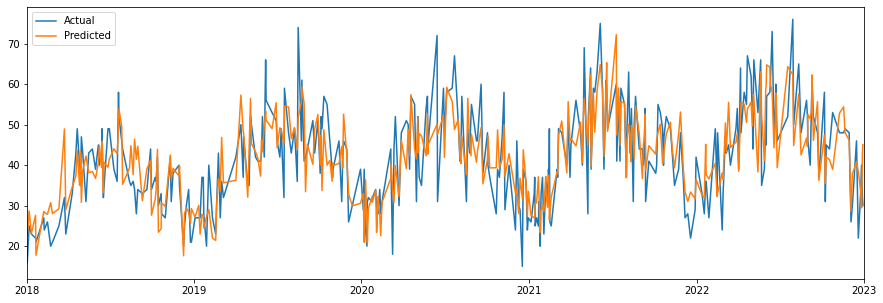

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df_val.date, y_test, label='Actual')
plt.plot(df_val.date, CB_y_pred, label='Predicted')

# Set x and y limits to zoom in on the year 2018
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2023-01-01')
plt.xlim(start_date, end_date)
plt.legend(loc='best')

plt.show()

### Predicting for 2023 - 2024

In [15]:
start_date = '2023-01-01'
end_date = '2024-01-01'

# Create a DataFrame with one column containing all dates between start_date and end_date
df_dates = pd.DataFrame({'date': pd.date_range(start=start_date, end=end_date, freq='D')})

#date features :
df_dates['dayofmonth'] = df_dates.date.dt.day
df_dates['dayofyear'] = df_dates.date.dt.dayofyear
df_dates['dayofweek'] = df_dates.date.dt.dayofweek
df_dates['month'] = df_dates.date.dt.month
df_dates['year'] = df_dates.date.dt.year
df_dates['weekofyear'] = df_dates.date.dt.weekofyear

# dummies features : 
new_df = pd.get_dummies(df_dates, columns = ['dayofmonth','dayofweek','month','weekofyear'])
new_df.head()

C:\Users\fadak\AppData\Local\Temp/ipykernel_1056/184265833.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_dates['weekofyear'] = df_dates.date.dt.weekofyear


,date,dayofyear,year,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,dayofmonth_6,dayofmonth_7,...,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52
0,2023-01-01,1,2023,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2023-01-02,2,2023,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023-01-03,3,2023,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2023-01-04,4,2023,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023-01-05,5,2023,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_2023 = new_df.drop(['date'], axis=1).values
y_2023 = CB_model.predict(X_2023)

### Plotting the prediction for future

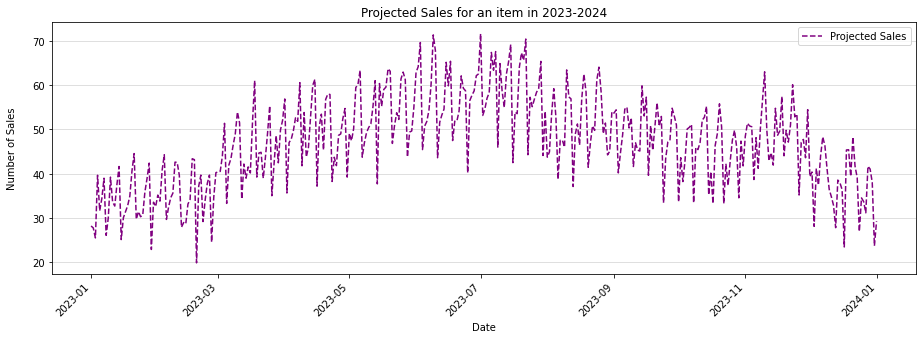

In [18]:
plt.figure(figsize=(15,5))
plt.plot(df_dates.date.values, y_2023, color='purple', linestyle='--', label='Projected Sales')
plt.title('Projected Sales for an item in 2023-2024')
plt.xlabel('Date')
plt.ylabel('Number of Sales', labelpad=15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
plt.show()